# Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [51]:
df = pd.read_csv(r'Fertilizer Prediction.csv')

In [52]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [53]:
df.shape

(99, 9)

In [54]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [55]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [56]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [57]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [58]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

# Univariate Analysis

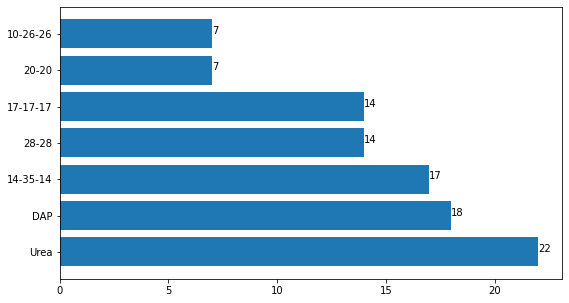

In [59]:
labels = df["Fertilizer Name"].unique()
counts = list(df["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

# EDA

In [60]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

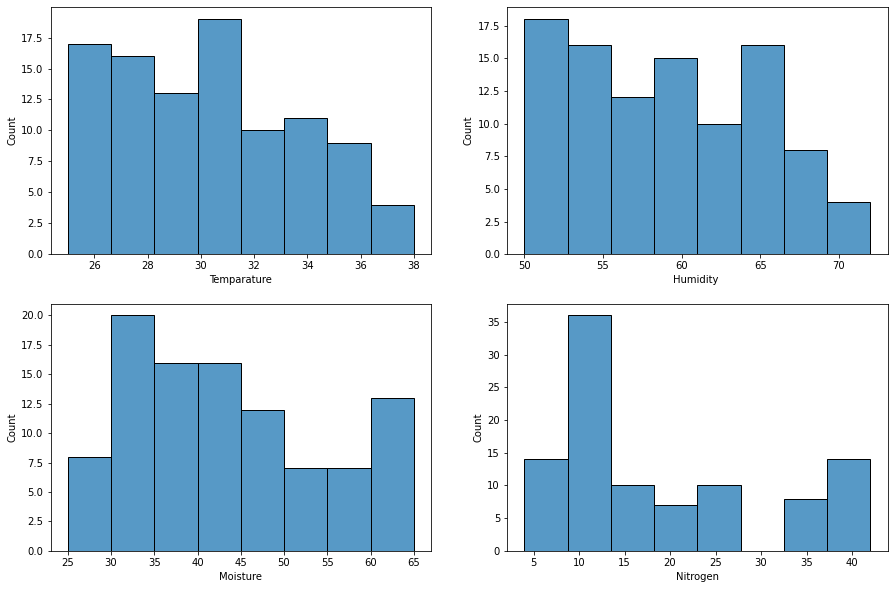

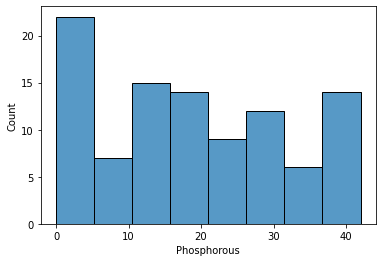

In [61]:
plt.figure(figsize=(15,10))
i = 1
for column in continuous_data_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(df[column])
    i+=1
plt.show()

sns.histplot(df[continuous_data_cols[-1]])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


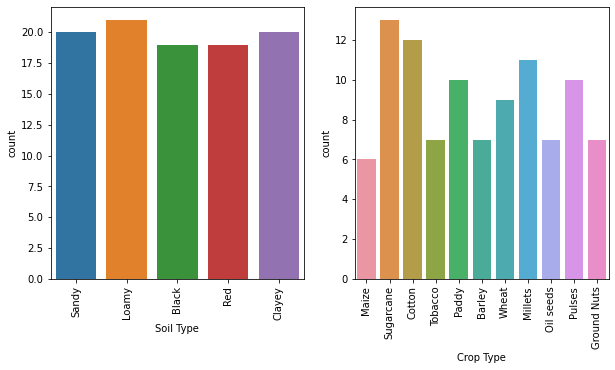

In [62]:
plt.figure(figsize=(10,5))
i = 1
for column in categorical_data_cols:
    plt.subplot(1,2,i)
    sns.countplot(df[column])
    plt.xticks(rotation = 90)
    i+=1
plt.show()

# Bivariate analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1512x1224 with 0 Axes>

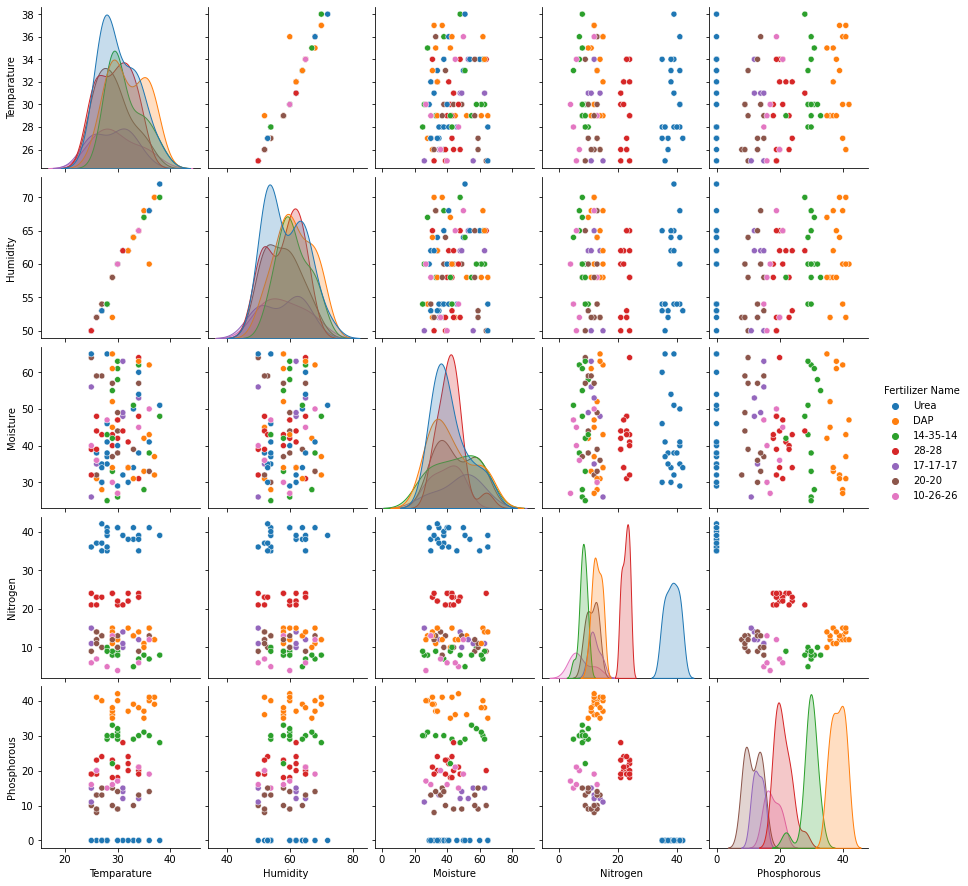

In [63]:
plt.figure(figsize=(21,17))
sns.pairplot(df[continuous_data_cols + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

# Correlation Matrix

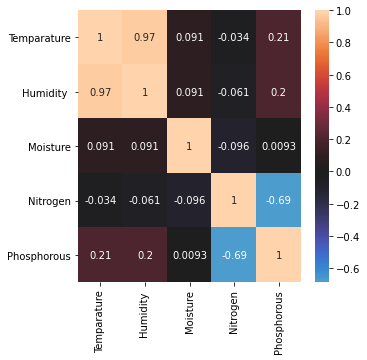

In [64]:
plt.figure(figsize = (5,5))
sns.heatmap(df[continuous_data_cols].corr(), center = 0, annot = True)
plt.show()

# Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
soil_type_label_encoder = LabelEncoder()
df["Soil Type"] = soil_type_label_encoder.fit_transform(df["Soil Type"])

In [67]:
crop_type_label_encoder = LabelEncoder()
df["Crop Type"] = crop_type_label_encoder.fit_transform(df["Crop Type"])

In [68]:
croptype_dict = {}
for i in range(len(df["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(df["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [69]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


# Training and Testing Data

In [70]:
X=df.drop('Fertilizer Name', axis=1)
y=df['Fertilizer Name']

In [71]:
X.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0


In [72]:
y.head()

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
Name: Fertilizer Name, dtype: object

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)

# Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
model = []
accuracy = []

# Models

## Logistic Regression 

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.96

In [77]:
accuracy.append(lr.score(X_test,y_test))
model.append('Logistic Regression')

## Random Forest 

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [79]:
accuracy.append(clf.score(X_test,y_test))
model.append('Random Forest')

## Naive Bayes 

In [80]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [81]:
accuracy.append(clf.score(X_test,y_test))
model.append('Naive Bayes')

## Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.92

In [83]:
accuracy.append(clf.score(X_test,y_test))
model.append('Decision Tree Classifier')

## SVM 

In [84]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8

In [85]:
accuracy.append(clf.score(X_test,y_test))
model.append('Support Vector Machine')

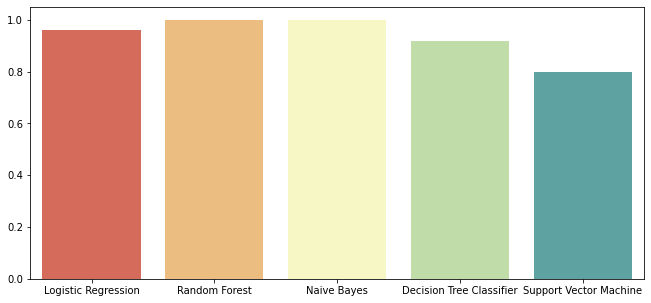

In [86]:
f = plt.figure(figsize=(11,5))
sns.barplot(x=model, y=accuracy, palette='Spectral')

In [87]:
model

['Logistic Regression',
 'Random Forest',
 'Naive Bayes',
 'Decision Tree Classifier',
 'Support Vector Machine']

In [88]:
accuracy

[0.96, 1.0, 1.0, 0.92, 0.8]